# ML/ Image Quality Detector
> part 3 HW
## LET's teach  a Convolutional Neuron To "learn" an image "feature"

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import torch,torch.nn as nn, torch.optim as optim

In [6]:
# Let's create a image maually
img_1 = np.array([
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])
img_2 = np.array([
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
   [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
])



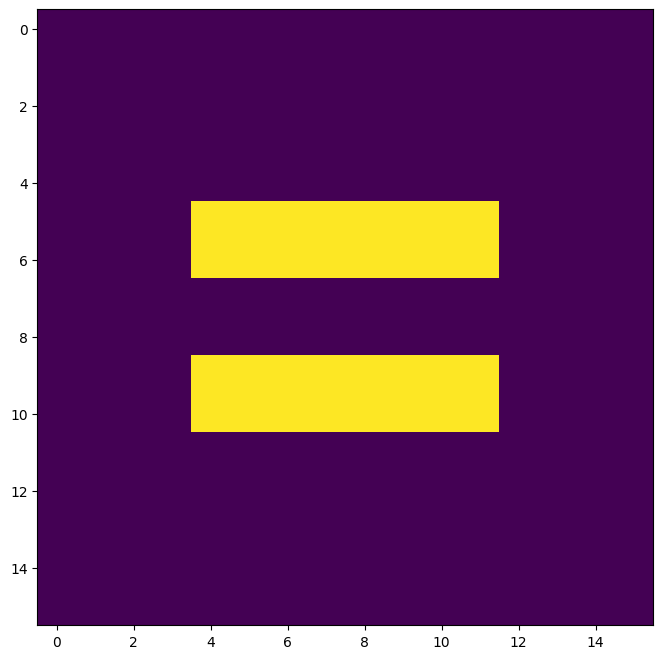

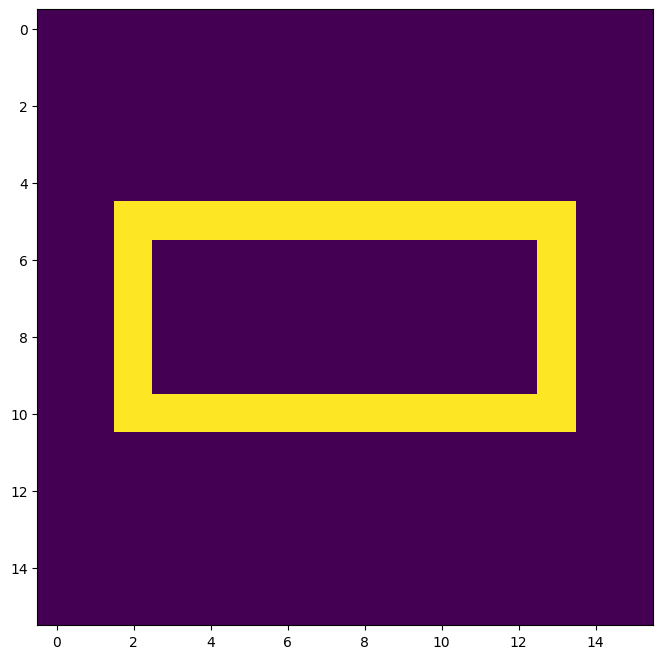

In [7]:
# Plot it
plt.figure(figsize=(8,8))
plt.imshow(img_1)

plt.figure(figsize=(8,8))
plt.imshow(img_2)




## Let's teach the CNN to distinguish betwin square and circle

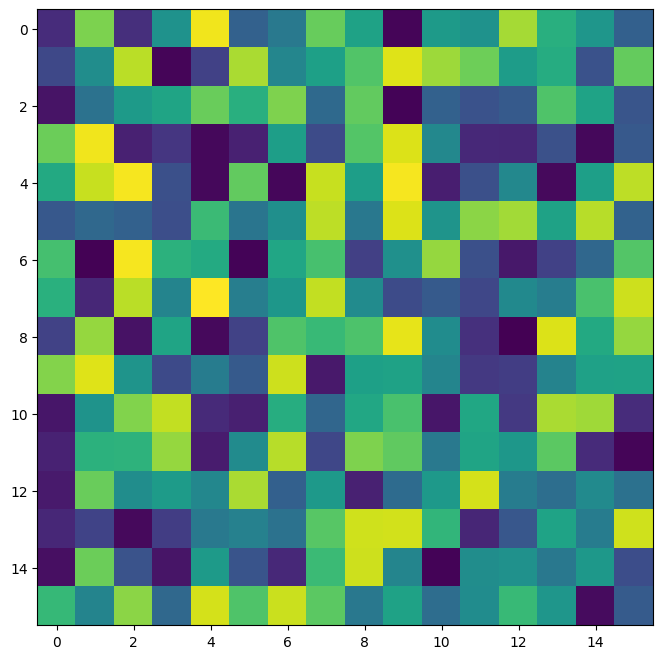

In [8]:
# equal - 0 
# rectangles - 1

# img of a square -> X CNN ---> Y -> 0
# img of circlel  -> X CNN ---> Y -> 1

cn = nn.Conv2d(in_channels= 1, out_channels=1, kernel_size=(16,16))
plt.figure(figsize=(8,8))
plt.imshow(cn.weight.detach().numpy()[0][0])

## Let's pass the image trough the neuron without traning

In [12]:
X = [
    torch.from_numpy(img_1).type(torch.FloatTensor).view(1,16,16),# square
    torch.from_numpy(img_2).type(torch.FloatTensor).view(1,16,16),# circle
]
Y = [
    # torch.FloatTensor([[[-1]]]),
    torch.FloatTensor([[[0]]]),
    torch.FloatTensor([[[1]]]),
]
Yp = [None,None,None]
Yp[0] = cn(X[0])
Yp[1] = cn(X[1])
# Yp[2] = cn(X[2])

print(Yp)


[tensor([[[-3.6280]]], grad_fn=<SqueezeBackward1>), tensor([[[3.6280]]], grad_fn=<SqueezeBackward1>), None]


In [13]:
# Training
criterion = nn.BCEWithLogitsLoss()
optimizer =  optim.SGD(cn.parameters(), lr = 0.00005)

for epoch in range(50000):

    for i in range(len(X)):

        optimizer.zero_grad()

        yp = cn(X[i])

        loss = criterion(yp, Y[i])

        loss.backward()
        optimizer.step()

    if epoch % 1000 == 0:
        print(f"epoch{epoch:6d} loss ={loss}")

            

epoch     0 loss =0.026222066953778267
epoch  1000 loss =0.02569670043885708
epoch  2000 loss =0.025191981345415115
epoch  3000 loss =0.024706777185201645
epoch  4000 loss =0.02423902601003647
epoch  5000 loss =0.02378828264772892
epoch  6000 loss =0.023354340344667435
epoch  7000 loss =0.022936053574085236
epoch  8000 loss =0.02253134548664093
epoch  9000 loss =0.022141166031360626
epoch 10000 loss =0.0217643640935421
epoch 11000 loss =0.02139897271990776
epoch 12000 loss =0.02104710415005684
epoch 13000 loss =0.02070503681898117
epoch 14000 loss =0.020374765619635582
epoch 15000 loss =0.020054202526807785
epoch 16000 loss =0.019743820652365685
epoch 17000 loss =0.01944246143102646
epoch 18000 loss =0.01915060169994831
epoch 19000 loss =0.018866611644625664
epoch 20000 loss =0.018591783940792084
epoch 21000 loss =0.018323436379432678
epoch 22000 loss =0.018064266070723534
epoch 23000 loss =0.017810648307204247
epoch 24000 loss =0.0175651665776968
epoch 25000 loss =0.017325950786471367

In [14]:
# Test treined neuron
Yp[0] = cn(X[0])
Yp[1] = cn(X[1])
print(Yp)

[tensor([[[-4.3429]]], grad_fn=<SqueezeBackward1>), tensor([[[4.3429]]], grad_fn=<SqueezeBackward1>), None]


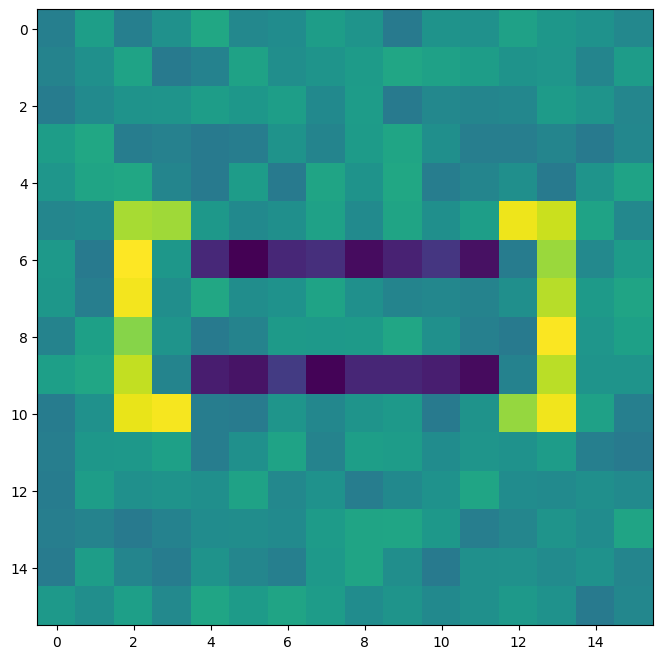

In [15]:
# Check neuron wheigt
plt.figure(figsize=(8,8))
plt.imshow(cn.weight.detach().numpy()[0][0])